In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.06G/1.06G [00:12<00:00, 83.8MB/s]
100% 1.06G/1.06G [00:12<00:00, 93.4MB/s]


In [ ]:
import zipfile
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout


In [ ]:
#generators
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/dogs_vs_cats/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)
validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/dogs_vs_cats/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Normalize (all values between 0 and 1)
def process(image,label):
  image=tf.cast(image/255,tf.float32)
  return image,label

train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)


In [ ]:
# create CNN model
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [ ]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 78s 108ms/step - loss: 1.0229 - accuracy: 0.6022 - val_loss: 0.5726 - val_accuracy: 0.7068
Epoch 2/10
625/625 [==============================] - 67s 106ms/step - loss: 0.5459 - accuracy: 0.7283 - val_loss: 0.5264 - val_accuracy: 0.7576
Epoch 3/10
625/625 [==============================] - 66s 105ms/step - loss: 0.4617 - accuracy: 0.7812 - val_loss: 0.4341 - val_accuracy: 0.8036
Epoch 4/10
625/625 [==============================] - 68s 108ms/step - loss: 0.3887 - accuracy: 0.8274 - val_loss: 0.4936 - val_accuracy: 0.7616
Epoch 5/10
625/625 [==============================] - 65s 103ms/step - loss: 0.3182 - accuracy: 0.8596 - val_loss: 0.6055 - val_accuracy: 0.7592
Epoch 6/10
625/625 [==============================] - 66s 106ms/step - loss: 0.2318 - accuracy: 0.9020 - val_loss: 1.8577 - val_accuracy: 0.6232
Epoch 7/10
625/625 [==============================] - 66s 106ms/step - loss: 0.1594 - accuracy: 0.9381 - val_loss: 0.5909 - val_ac

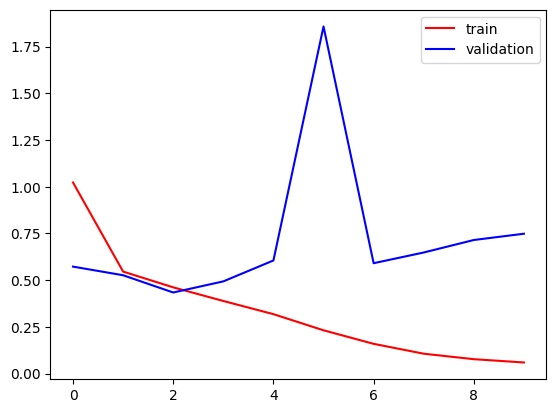

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

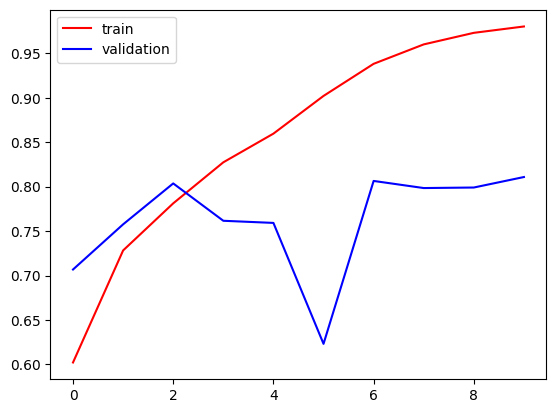

In [ ]:

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
import cv2

In [ ]:
test_img=cv2.imread('/content/dog.jpg')

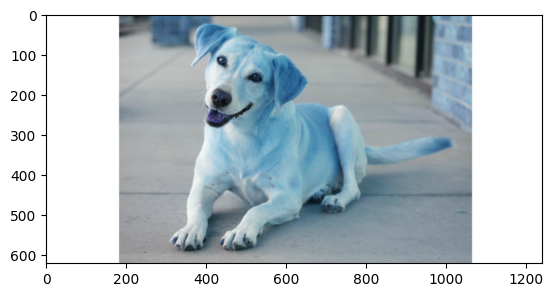

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(620, 1240, 3)

In [ ]:
test_img=cv2.resize(test_img,(256,256))

In [ ]:
test_input=test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 410ms/step


array([[1.]], dtype=float32)

In [ ]:
test1_img=cv2.imread('/content/cat.jpg')

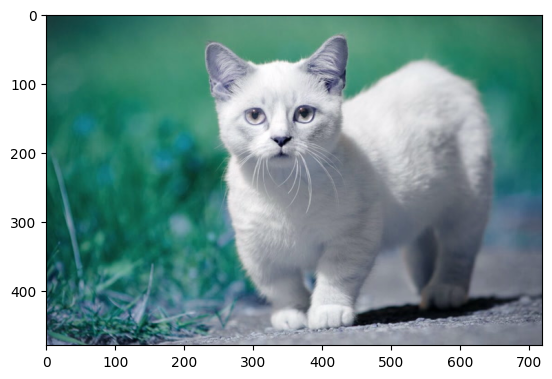

In [ ]:
plt.imshow(test1_img)

In [ ]:
test1_img.shape

(480, 720, 3)

In [ ]:
test1_img=cv2.resize(test1_img,(256,256))

In [ ]:
test1_input=test1_img.reshape((1,256,256,3))

In [ ]:
model.predict(test1_input)

1/1 [==============================] - 0s 48ms/step


array([[0.04461296]], dtype=float32)

In [ ]:
import pickle

In [ ]:
history_file = 'training_history.pkl'
with open(history_file, 'wb') as file:
    pickle.dump(history.history, file)

print(f"Training history has been saved to {history_file}")

# Save the entire model
model.save('trained_model.h5')
print("Trained model has been saved to 'trained_model.h5'")

# Optionally, save only the model weights
model.save_weights('model_weights.h5')
print("Model weights have been saved to 'model_weights.h5'")

with open('training_history.pkl', 'rb') as file:
    loaded_history = pickle.load(file)

print("Loaded training history:", loaded_history)

loaded_model = keras.models.load_model('trained_model.h5')
print("Model has been loaded from 'trained_model.h5'")

model.load_weights('model_weights.h5')
print("Model weights have been loaded from 'model_weights.h5'")

Training history has been saved to training_history.pkl


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Trained model has been saved to 'trained_model.h5'
Model weights have been saved to 'model_weights.h5'
Loaded training history: {'loss': [1.0228862762451172, 0.5459417700767517, 0.4617202579975128, 0.3887403607368469, 0.31821516156196594, 0.2318318784236908, 0.1594030261039734, 0.10658480226993561, 0.07727387547492981, 0.05964266508817673], 'accuracy': [0.6022499799728394, 0.7282500267028809, 0.7811999917030334, 0.8273500204086304, 0.8596000075340271, 0.9020000100135803, 0.9380999803543091, 0.9599499702453613, 0.9729499816894531, 0.9800999760627747], 'val_loss': [0.5725953578948975, 0.5263900756835938, 0.43410947918891907, 0.4936278760433197, 0.6055259704589844, 1.8576586246490479, 0.5908893346786499, 0.6482077240943909, 0.7150699496269226, 0.7486466765403748], 'val_accuracy': [0.7067999839782715, 0.7576000094413757, 0.803600013256073, 0.7616000175476074, 0.7591999769210815, 0.623199999332428, 0.8064000010490417, 0.7983999848365784, 0.7990000247955322, 0.8108000159263611]}
Model has be

In [ ]:
test_img = cv2.imread('/content/dog.jpg')
test_img = cv2.resize(test_img, (256, 256))
test_input = test_img.reshape((1, 256, 256, 3))
prediction = loaded_model.predict(test_input)
print("Prediction for dog image:", prediction)


1/1 [==============================] - 0s 346ms/step
Prediction for dog image: [[1.]]


In [ ]:

test1_img = cv2.imread('/content/cat.jpg')
test1_img = cv2.resize(test1_img, (256, 256))
test1_input = test1_img.reshape((1, 256, 256, 3))
prediction1 = loaded_model.predict(test1_input)
print("Prediction for cat image:", prediction1)

1/1 [==============================] - 0s 28ms/step
Prediction for cat image: [[0.04461296]]
